In [2]:
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [4]:
#Reading the data into the variable data
data = pd.read_csv('/Users/ashwinsureshbabu/NCI/SEM 1/Data Mining & Machine Learning/Project/DATA SET/4. Bank Churn/Churn_Modelling.csv')
   

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [7]:
data.columns = ['row_number', 'customer_id', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'isactive_member', 'estimated_salary', 'exited']
data.columns

Index(['row_number', 'customer_id', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'isactive_member', 'estimated_salary', 'exited'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   creditscore       10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_crcard        10000 non-null  int64  
 11  isactive_member   10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.shape

(10000, 14)

In [11]:
data.describe()

,row_number,customer_id,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
data['tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

<AxesSubplot:>

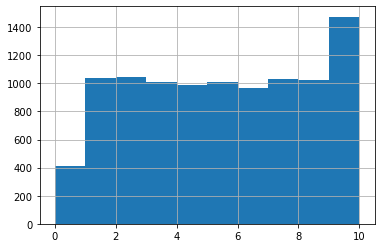

In [13]:
data['tenure'].hist()

In [14]:
#Lets look at missing values
display(data.isna().sum())

row_number          0
customer_id         0
surname             0
creditscore         0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_crcard          0
isactive_member     0
estimated_salary    0
exited              0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
#Let's look at "Exited" 
data['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [17]:
#Positive rratings percentage
print('Percentage of positive ratings: {:.2%}'.format(data['exited'].mean()))

Percentage of positive ratings: 20.37%


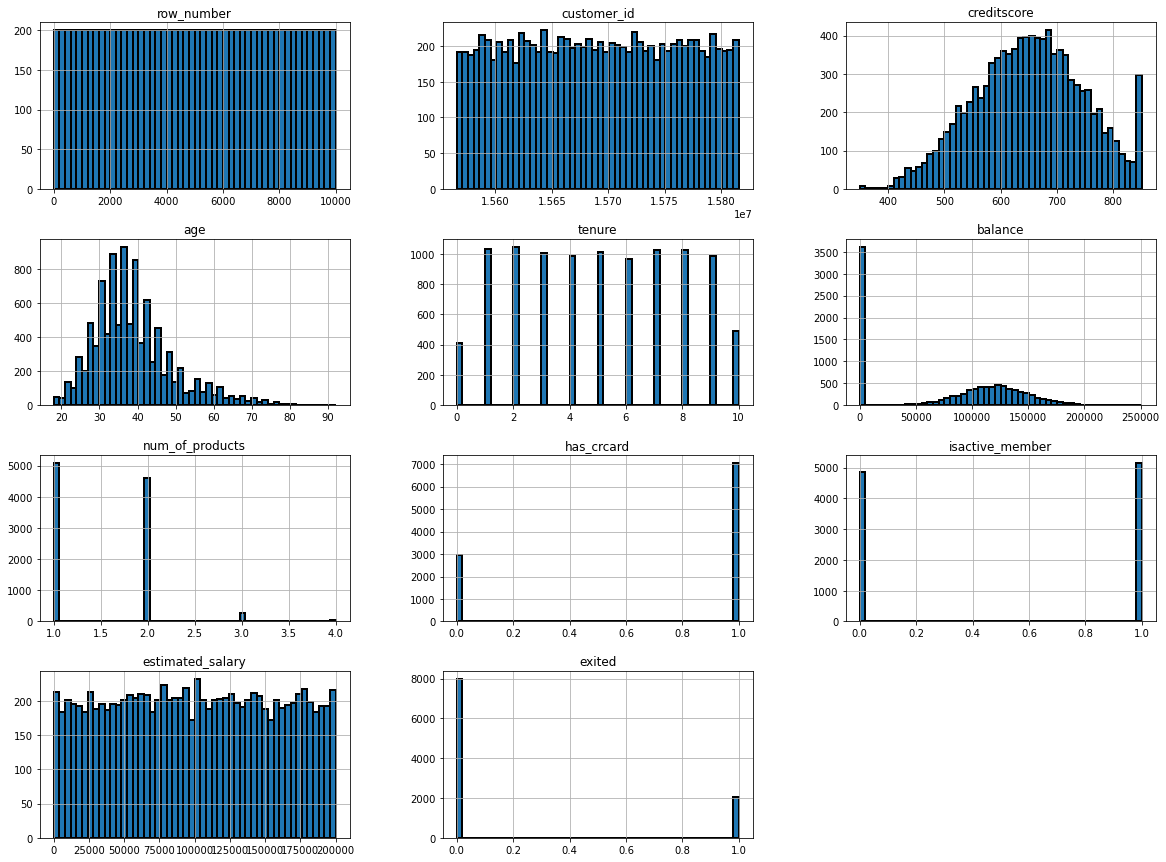

In [18]:
data.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

In [19]:
#Inorder to create a model we will be removing 3 columns that doesnt hold much weightage
data1 = data.drop(["row_number","customer_id","surname"],axis=1).copy()
display(data1.head())

,creditscore,geography,gender,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


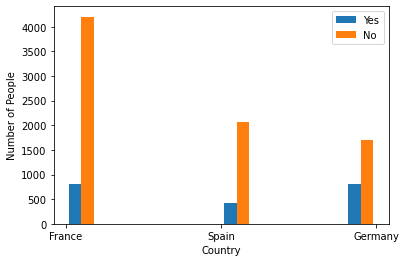

In [20]:
#Let's look and compare the fact of customer exit in different countries
exited_yes= data1[data1['exited'] == 1]['geography']
exited_no = data1[data1['exited'] == 0]['geography']

plt.hist([exited_yes,exited_no],label=("Yes","No"))
plt.xlabel("Country")
plt.ylabel("Number of People")
plt.legend();

We can conclude that the clients of France and Germany left the bank most of all, but in France there are twice as many clients as in Germany, therefore, in percentage terms, most of the clients left in Germany.

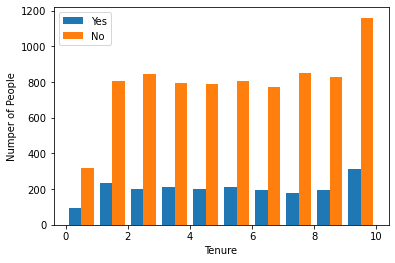

In [21]:
#Let's look and compare the fact of leaving clients with different age in the bank

tenure_yes = data1[data1.exited ==1].tenure
tenure_no = data1[data1.exited ==0].tenure

plt.hist([tenure_yes, tenure_no], label = ("Yes", "No"))
plt.xlabel("Tenure")
plt.ylabel("Numper of People")
plt.legend();

We can conclude that most customers leave with a ten-year term in the bank. Unexpectedly

<AxesSubplot:xlabel='exited', ylabel='count'>

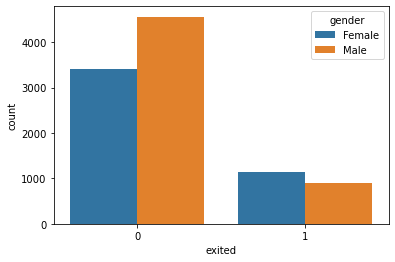

In [22]:
#Let's look and compare the fact of care for men and women

sns.countplot(data=data1,x=data1['exited'], hue=data1['gender'])

We can see more women leaving the bank.

<AxesSubplot:xlabel='isactive_member', ylabel='count'>

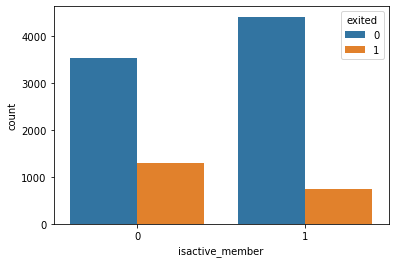

In [23]:
#Let's look and compare the fact of leaving customers with their activity

sns.countplot(x = data1['isactive_member'], hue = data1['exited'])

We see that inactive clients leave the most, as expected.

<AxesSubplot:xlabel='has_crcard', ylabel='count'>

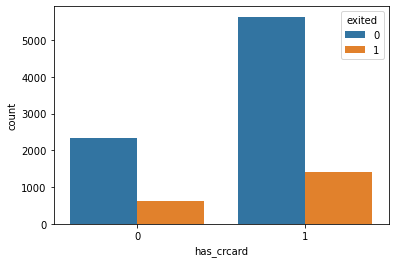

In [24]:
#Let's look and compare the fact of leaving customers with the presence of a credit card.

sns.countplot(x = data1['has_crcard'], hue = data1['exited'])

It seems that the share of people with cards is approximately the same in the group of those who left and those who did not.

In [25]:
#Columns of geography and gender will be converted to numeric using OHE, we need quantitative characteristics for greater accuracy

geography_ohe = pd.get_dummies(data['geography'], drop_first = True)
gender_ohe = pd.get_dummies(data['gender'], drop_first=True)

data1.drop(['gender', 'geography'], axis = 1 , inplace = True)

data_ohe = pd.concat([data1, geography_ohe, gender_ohe], axis = 1)

data_ohe.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [26]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   creditscore       10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   num_of_products   10000 non-null  int64  
 5   has_crcard        10000 non-null  int64  
 6   isactive_member   10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   exited            10000 non-null  int64  
 9   Germany           10000 non-null  uint8  
 10  Spain             10000 non-null  uint8  
 11  Male              10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [27]:
display(data_ohe.isna().sum())

creditscore         0
age                 0
tenure              0
balance             0
num_of_products     0
has_crcard          0
isactive_member     0
estimated_salary    0
exited              0
Germany             0
Spain               0
Male                0
dtype: int64

In [28]:
#Let's do a correlation analysis of the data

data.corr()

,row_number,customer_id,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited
row_number,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
customer_id,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
creditscore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
num_of_products,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
has_crcard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactive_member,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


array([[<AxesSubplot:xlabel='row_number', ylabel='row_number'>,
        <AxesSubplot:xlabel='customer_id', ylabel='row_number'>,
        <AxesSubplot:xlabel='creditscore', ylabel='row_number'>,
        <AxesSubplot:xlabel='age', ylabel='row_number'>,
        <AxesSubplot:xlabel='tenure', ylabel='row_number'>,
        <AxesSubplot:xlabel='balance', ylabel='row_number'>,
        <AxesSubplot:xlabel='num_of_products', ylabel='row_number'>,
        <AxesSubplot:xlabel='has_crcard', ylabel='row_number'>,
        <AxesSubplot:xlabel='isactive_member', ylabel='row_number'>,
        <AxesSubplot:xlabel='estimated_salary', ylabel='row_number'>,
        <AxesSubplot:xlabel='exited', ylabel='row_number'>],
       [<AxesSubplot:xlabel='row_number', ylabel='customer_id'>,
        <AxesSubplot:xlabel='customer_id', ylabel='customer_id'>,
        <AxesSubplot:xlabel='creditscore', ylabel='customer_id'>,
        <AxesSubplot:xlabel='age', ylabel='customer_id'>,
        <AxesSubplot:xlabel='tenure', yl

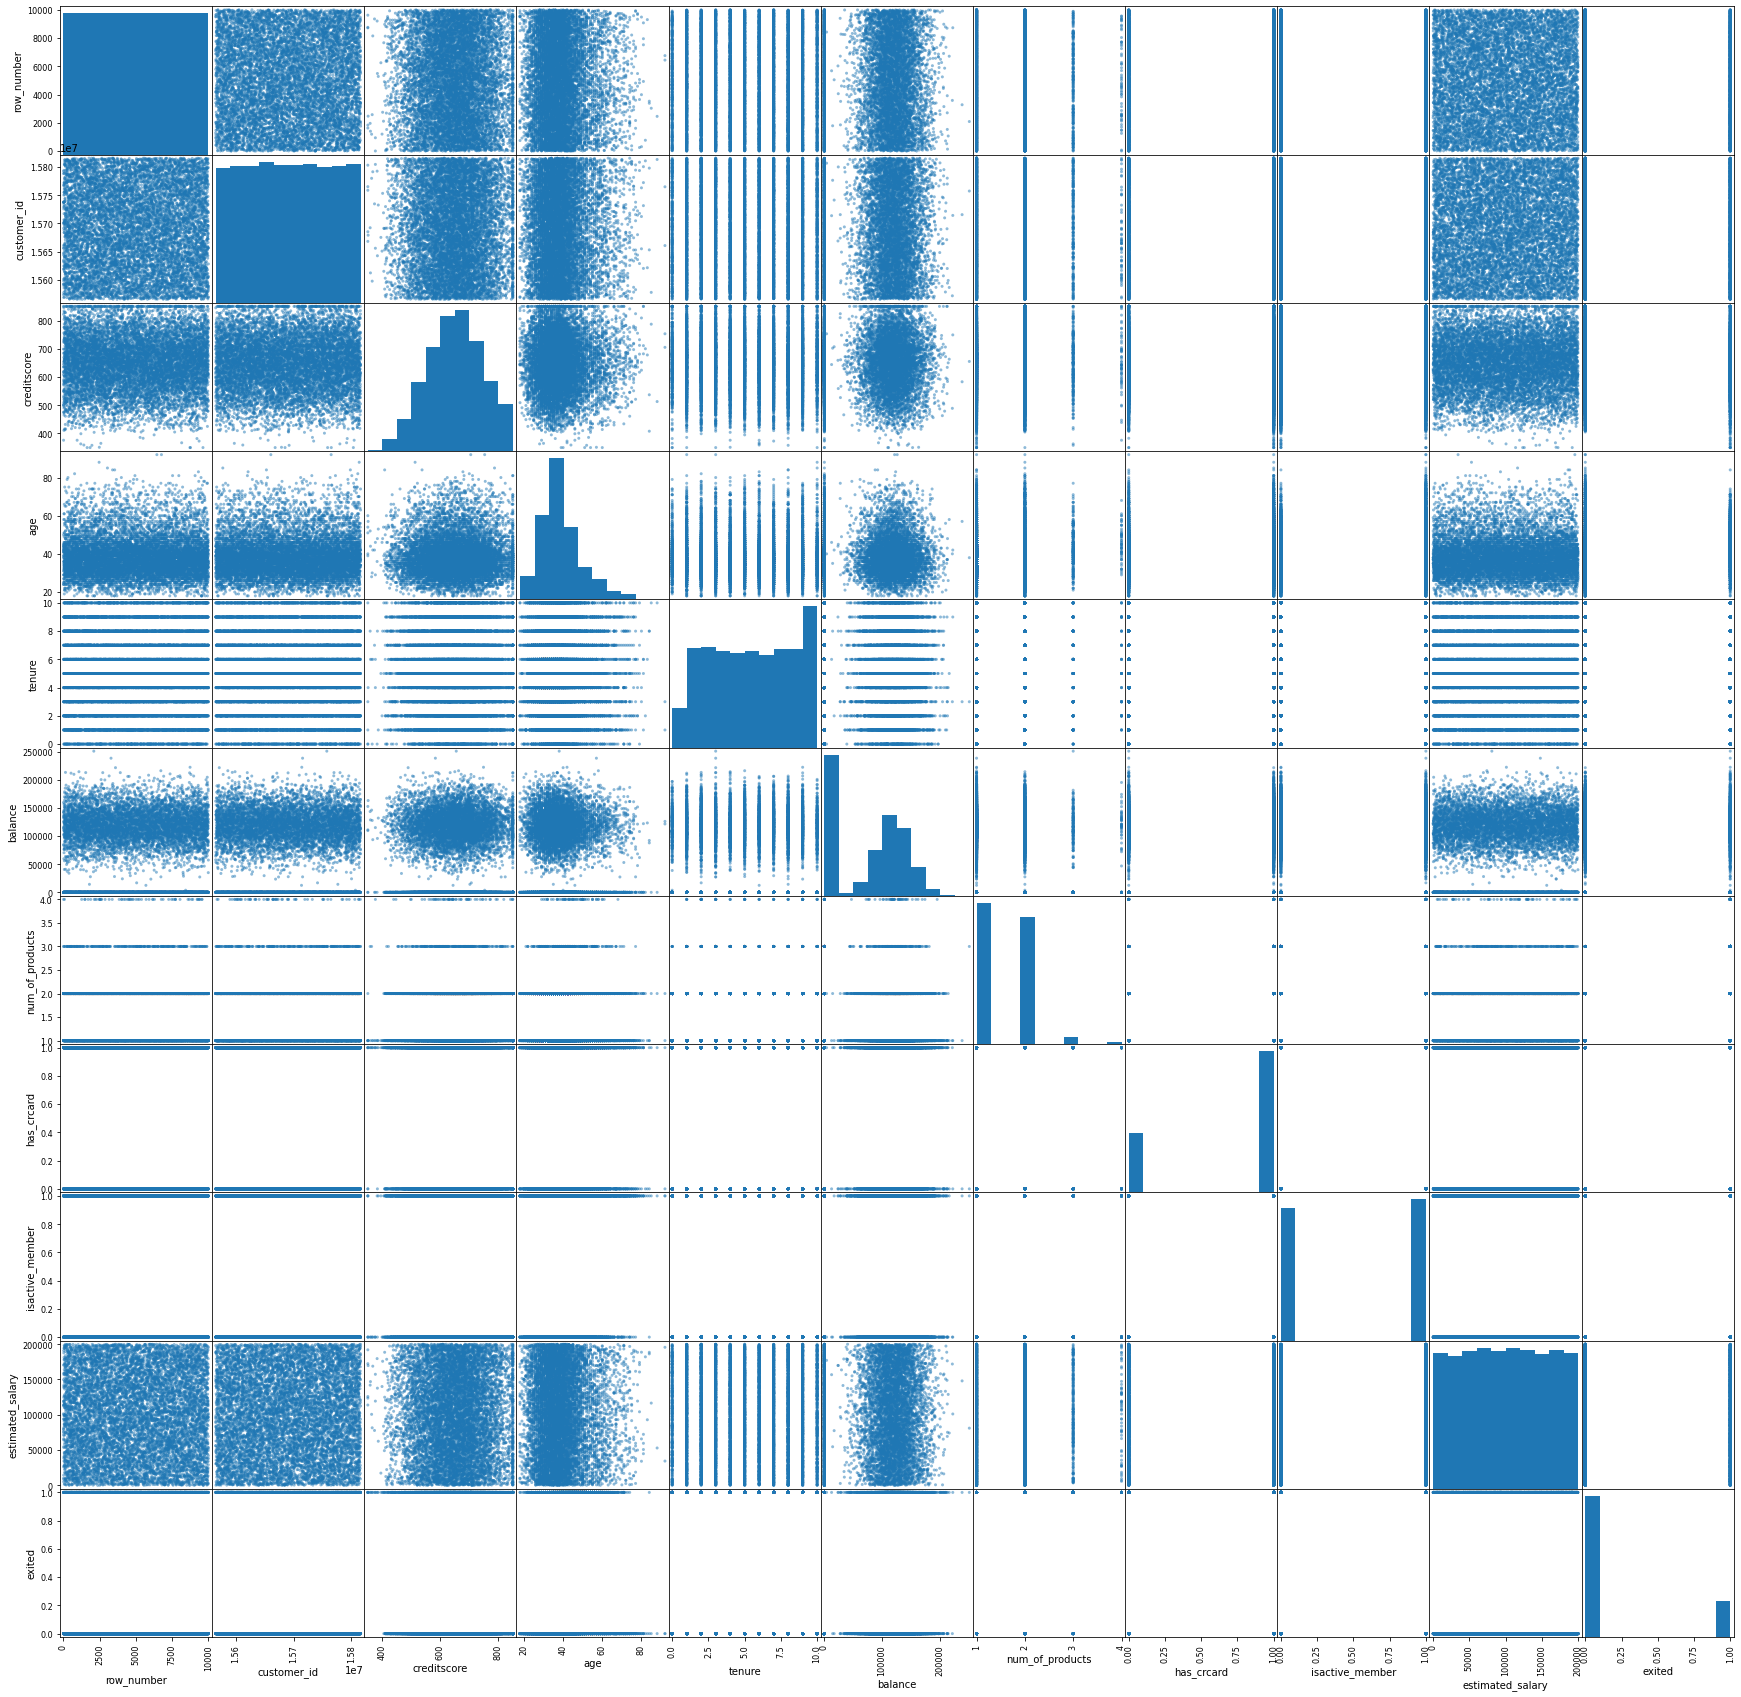

In [29]:
pd.plotting.scatter_matrix(data, figsize = (30, 30))

No correlation is observed.

In [30]:
#Let's break the data into samples

features = data_ohe.drop(['exited'], axis = 1)
target = data_ohe['exited']

In [31]:
#We get a test sample of 20% and again divide the remaining 80% to get a test sample. We will train on 60% of the data
from sklearn.model_selection import train_test_split

features_train , features_remain , target_train , target_remain = train_test_split(features, target, 
                                                                                  test_size = 0.4, random_state=12345)

features_valid , features_test , target_valid , target_test = train_test_split(features_remain, target_remain,
                                                                              test_size = 0.5, random_state=12345)

In [32]:
features_train.shape

(6000, 11)

In [33]:
features_valid.shape

(2000, 11)

In [34]:
features_test.shape

(2000, 11)

In [35]:
#Let's do feature scaling. Scaling features across the entire dataset can lead to data leakage. We will train only 'train'.

from sklearn.preprocessing import StandardScaler

numeric = ['creditscore', 'age', 'balance', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

pd.options.mode.chained_assignment = None

features_train[numeric] = scaler.transform(features_train[numeric])

features_train.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,Germany,Spain,Male
7479,-0.886751,-0.373192,8,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,8,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,3,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,6,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,2,1.140475,1,0,0,1.524268,1,0,0


In [36]:
#Let's train "valid"

features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,Germany,Spain,Male
8532,-0.699824,-0.373192,2,-1.233163,2,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,3,-1.233163,1,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,0,0.438711,1,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,10,1.239884,1,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,10,-1.233163,2,1,0,1.358533,0,1,1


In [37]:
#Lets train "test"

features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,Germany,Spain,Male
7041,-2.226392,-0.088482,2,-1.233163,2,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,9,-1.233163,1,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,5,0.722307,1,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,10,-1.233163,2,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,10,0.615625,1,0,1,-1.070919,0,0,1


In [38]:
#Let's start from Logistic Regression

model = LogisticRegression(random_state =12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.3316412859560068


In [39]:
#Pretty bad figure, repeat with `class_weight = 'balanced' '

model = LogisticRegression(random_state =12345, solver='liblinear', class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4859335038363171


In [40]:
#Now it is better . But now we will not choose hyperparameters, let's move on to the next algorithm
#Random Forest

model = RandomForestClassifier(random_state = 12345, n_estimators = 10)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5807407407407408


In [41]:
#Random forest showed the best result. Let's also try with class_weight = 'balanced'


model = RandomForestClassifier(random_state = 12345, n_estimators = 10,
                              class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5389221556886228


We will also not choose hyperparameters now until we fix the problem with the imbalance.

In [42]:
data['exited'].value_counts().to_frame()

,exited
0,7963
1,2037


Upsampling :

Divide the training sample into negative and positive
Duplicate the objects of the positive class and merge them with the - Objects of the negative class
Mix data

In [43]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsample = pd.concat([features_zeros] + [features_ones] * repeat )
    target_upsample  = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsample, target_upsample = shuffle(features_upsample, target_upsample, 
                                                random_state = 12345)
    return features_upsample, target_upsample

features_upsample, target_upsample = upsample(features_train , target_train, 5)

In [44]:
target_upsample.shape

(10784,)

In [45]:
features_upsample.shape

(10784, 11)

In [46]:
#Logistic Regression 

model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_upsample, target_upsample)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4859101294744859


In [47]:
#We observe a slight increase in the metric, close to the one we received by specifying the class_weight parameter

#Random Forest

model = RandomForestClassifier(random_state = 12345, n_estimators = 10)
model.fit(features_upsample, target_upsample)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))



F1: 0.5846994535519126


There is an improvement here too.

Dowmsampling

-divide the training sample into negative and positive objects
-randomly discard some of the negative items
-taking into account the received data, we will create a new training sample
-shuffle the data

In [48]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsample = pd.concat(
        [features_zeros.sample(frac = fraction, random_state = 12345)] + [features_ones])
    
    target_downsample = pd.concat(
    [target_zeros.sample(frac = fraction, random_state = 12345)] + [target_ones])
    
    features_downsample, target_downsample = shuffle(features_downsample, target_downsample,
                                                    random_state = 12345)
    return features_downsample, target_downsample

features_downsample, target_downsample = downsample(features_train, target_train, 0.1)

In [49]:
features_downsample.shape

(1676, 11)

In [50]:
target_downsample.shape

(1676,)

In [51]:
#Logistic Regression


model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_downsample, target_downsample)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.43010752688172044


In [52]:
#Random Forest

model = RandomForestClassifier(random_state = 12345, n_estimators = 10)
model.fit(features_downsample, target_downsample)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.476510067114094


Downsampling shows worse results than Upsampling for all algorithms. Let's try to change the threshold and see what the indicators will be - this time we will turn to recall and precision.

Threshold change

Logistic Regression
the threshold value is specified from 0 to 0.95 with a step of 0.02

Threshold = 0.00 | Accuracy = 0.209, Completeness = 1.000 | F1 = 0.346
Threshold = 0.05 | Accuracy = 0.235, Completeness = 0.981 | F1 = 0.379
Threshold = 0.10 | Accuracy = 0.276, Completeness = 0.897 | F1 = 0.422
Threshold = 0.15 | Accuracy = 0.326, Completeness = 0.789 | F1 = 0.462
Threshold = 0.20 | Accuracy = 0.369, Completeness = 0.675 | F1 = 0.477
Threshold = 0.25 | Accuracy = 0.421, Completeness = 0.598 | F1 = 0.494
Threshold = 0.30 | Accuracy = 0.456, Completeness = 0.519 | F1 = 0.485
Threshold = 0.35 | Accuracy = 0.488, Completeness = 0.423 | F1 = 0.453
Threshold = 0.40 | Accuracy = 0.500, Completeness = 0.330 | F1 = 0.398
Threshold = 0.45 | Accuracy = 0.525, Completeness = 0.280 | F1 = 0.365
Threshold = 0.50 | Accuracy = 0.566, Completeness = 0.234 | F1 = 0.332
Threshold = 0.55 | Accuracy = 0.615, Completeness = 0.172 | F1 = 0.269
Threshold = 0.60 | Accuracy = 0.667, Completeness = 0.124 | F1 = 0.210
Threshold = 0.65 | Accuracy = 0.667, Completeness = 0.081 | F1 = 0.145
Thresh

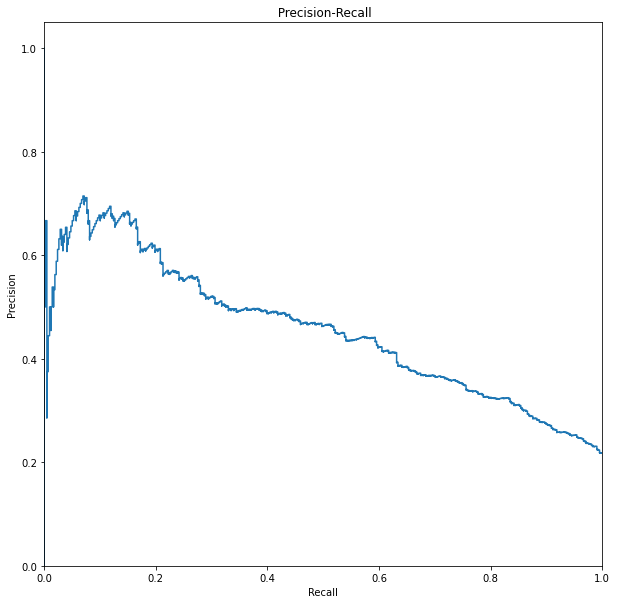

In [53]:
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid) 
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, threshold = precision_recall_curve(target_valid, probabilities_one_valid)
    
plt.figure(figsize=(10,10))
plt.step(recall, precision, where = 'post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Precision-Recall')
plt.show() 

For a threshold of 0, recall is 1 - all responses are positive. At a threshold of 0.85, the model stops giving correct answers. The highest value of F1 is observed at a threshold of 0.25.

est = 1
Threshold = 0.00 | Accuracy = 0.475, Completeness = 0.498 | F1 = 0.486
_________________________________________
est = 1
Threshold = 0.05 | Accuracy = 0.475, Completeness = 0.498 | F1 = 0.486
_________________________________________
est = 1
Threshold = 0.10 | Accuracy = 0.475, Completeness = 0.498 | F1 = 0.486
_________________________________________
est = 1
Threshold = 0.15 | Accuracy = 0.475, Completeness = 0.498 | F1 = 0.486
_________________________________________
est = 1
Threshold = 0.20 | Accuracy = 0.475, Completeness = 0.498 | F1 = 0.486
_________________________________________
est = 1
Threshold = 0.25 | Accuracy = 0.475, Completeness = 0.498 | F1 = 0.486
_________________________________________
est = 1
Threshold = 0.30 | Accuracy = 0.475, Completeness = 0.498 | F1 = 0.486
_________________________________________
est = 1
Threshold = 0.35 | Accuracy = 0.475, Completeness = 0.498 | F1 = 0.486
_________________________________________
est = 1
Threshold = 0.40 | Accur

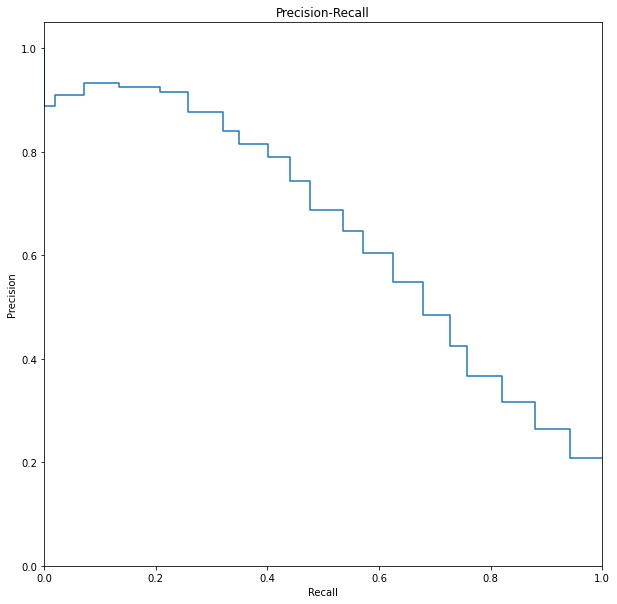

In [54]:
#Random Forest

best_model = None
best_result = 0

for est in range(1, 20):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est)
    model.fit(features_train, target_train)
    probabilities_valid = model.predict_proba(features_valid) 
    probabilities_one_valid = probabilities_valid[:, 1]
    
    for threshold in np.arange(0, 0.95, 0.05):  
        predicted_valid = probabilities_one_valid > threshold
        precision = precision_score(target_valid, predicted_valid)
        recall = recall_score(target_valid, predicted_valid)
        f1 = f1_score(target_valid, predicted_valid)
                
        if precision > best_result :
            best_model = model
            best_result = precision
        
        if recall > best_result :
            best_model = model
            best_result = recall
       
        if threshold > best_result :
            best_model = model
            best_result = threshold 
          
        if f1 > best_result :
            best_model = model
            best_result = f1
            
        print('est = {:.0f}'.format(est))
        print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))
        print('_________________________________________')
precision, recall, threshold = precision_recall_curve(target_valid, probabilities_one_valid)
    
plt.figure(figsize=(10,10))
plt.step(recall, precision, where = 'post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.show()

The highest score is achieved at a threshold of 0.3.

Model testing
To test the model, we use the Random Forest model, and to combat the imbalance, we use upsampling, since it showed the best result.

In [55]:
final_model = RandomForestClassifier(random_state = 12345, 
                                      n_estimators = 45,
                                    max_depth = 50)
final_model.fit(features_upsample, target_upsample)
prediction_test = final_model.predict(features_test)

In [56]:
#To assess the quality, we visualize the error matrix

conf_matrix = confusion_matrix(target_test, prediction_test)
print(conf_matrix)

[[1464  113]
 [ 197  226]]


In [58]:
#Calculate metrics


accuracy = accuracy_score(target_test, prediction_test)
precision = precision_score(target_test, prediction_test)
recall = recall_score(target_test, prediction_test)
f1 = f1_score(target_test, prediction_test)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.845
Precision: 0.6666666666666666
Recall: 0.5342789598108747
F1: 0.5931758530183726


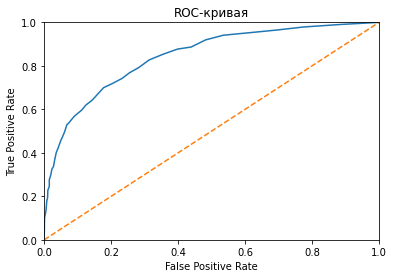

In [59]:
#Let's build a ROC curve

probabilities = final_model.predict_proba(features_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(target_test, probabilities)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [60]:
#Calculate AUC

auc_roc = roc_auc_score(target_test, probabilities)
print('AUC:',auc_roc)

AUC: 0.8440795657433765
